##Proyecto de distribucion binomial en python

##Librerias

In [108]:
import numpy as np                     # Para manejar matrices y arreglos de numeros
from numpy.random import binomial      # Generador aleatorio de numeros basado en distribucion binomial
from scipy.stats import binom          # Para implementar la funcion binomial mas facil
from math import factorial             # Para poder aplicar la funcion factorial
import matplotlib.pyplot as plt        # Para poder visualizar los resultados en un grafico

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [35]:
# definición de la distribución binomial, k = (Numero de casos exitosos) n = (Numero de lanzamientos) p = (Probabilidad de exito)
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [36]:
print("Probabilidades =", my_binomial(2, 3, 0.5))

# Mismo resultado pero ahora usando scipy
dist = binom(3, 0.5)
dist.pmf(2) 


Probabilidades = 0.375


0.375

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [17]:
dist.cdf(2)  # cdf = densidad acumulada, la posibilidad de que toque 2 o menos caras

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [62]:
# simulación lanzamientos de moneda equilibrada
# (ejecutar esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

0

##Simulacion de 100 experimentos 
* Cada experimento son 3 tiradas de monedas

In [111]:
arr1 = [] 
for _ in range(100): 
  arr1.append(binomial(n, p)) 

In [112]:
np.unique(arr1, return_counts=True)

(array([0, 1, 2, 3]), array([14, 36, 37, 13]))

In [113]:
np.unique(arr1, return_counts=True)[1]/len(arr1)

array([0.14, 0.36, 0.37, 0.13])

##Simulacion vs Teoria Frecuentista 
* Primer simulacion con 20 experimentos 
* Segunda simulacion con 200 experimentos 
* Tercer simulacion con 20.000 experimentos

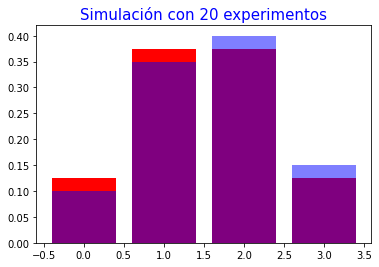

[0 1 2 3]
[2 7 8 3]


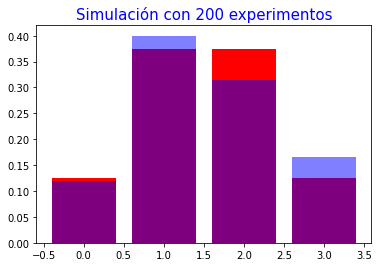

[0 1 2 3]
[24 80 63 33]


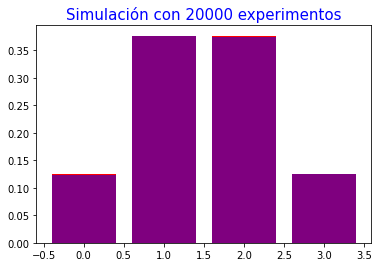

[0 1 2 3]
[2482 7528 7480 2510]


In [122]:
def plot_hist(num_trials):                                                                     #Funcion de numeros de intentos
  values = [0,1,2,3]                                                                           #Posibilidades de cantidad de veces que salga "cara" en 3 intentos 
  arr = []                                                                                     #Array donde se guardan las simulaciones
  for _ in range(num_trials):                                                                  #Ciclo for con "n" numeros de intentos en el que se repite los experimentos aleatorios
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)                       #Distribucion simulada de los experimentos en porcentaje
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]                                #Distribucion teorica frecuentista
  plt.bar(values, distribucion_teorica, label = 'Teoría', color = 'red')
  plt.bar(values, distribucion_simulada, label = 'Simulación', alpha = 0.5, color = 'blue')
  plt.title('Simulación con {} experimentos'.format(num_trials), 
             fontsize=15, 
             color = "blue")
  
  
  plt.show() 
  print(np.unique(arr, return_counts=True)[0]) 
  print(np.unique(arr, return_counts=True)[1])

plot_hist(20)                                                                                  #Grafico con 20 experimentos
plot_hist(200)                                                                                 #Grafico con 200 experimentos
plot_hist(20000)                                                                               #Grafico con 20.000 experimentos

## 0 = Ninguna cara
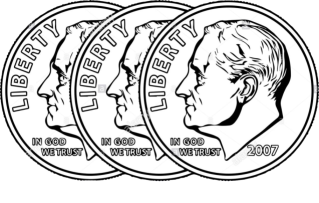

## 1 = Una cara
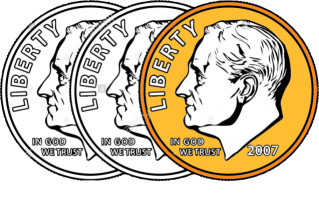

## 2 = Dos caras
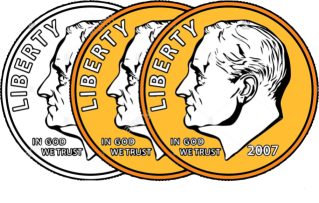

## 3 = Todas caras
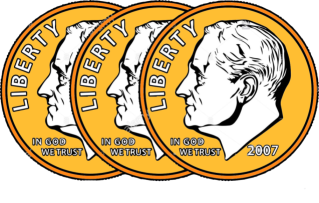